# 2014222 - Semester 2 CA-01 -April 2024¶

# Part 2

# Step 1: Import Python Libraries

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Pandas) in order to perform data cleansing. These are the libraries that are 
# conventionally used as a common practice in order to perform mathematical and statistical operations during a data analysis
# process

import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

# Using train_test_split and StandardScaler together in a machine learning pipeline
# ensures that the model is trained on a well-prepared dataset,
# leading to better performance and more reliable predictions.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using Sequential to create a model and Dense for adding layers is a powerful
# and straightforward way to build neural networks in TensorFlow.
# This approach is widely used for a plethora of deep learning tasks where
# complex architectures are not required, providing a great balance between simplicity and functionality.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# I had to install:
#!pip install shap
#!pip install keras-tuner
#!pip install tensorflow
#!pip install --upgrade pip
#pip install keras
#!pip install --upgrade tensorflow

# This combination of imports from TensorFlow and KerasTuner is used to build a neural network model
# (Sequential with Dense layers), optimize its parameters with an efficient optimizer (Adam),
# and fine-tune its hyperparameters (using RandomSearch from KerasTuner)
# to improve performance.
# This process is key to developing high-performing models tailored to specific data sets and tasks.

from keras_tuner.tuners import RandomSearch
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For a model saved with Keras
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Dropout

import shap

/var/folders/w6/kky37qvj3gb91yr_ymt533bm0000gn/T/ipykernel_2060/2233416458.py:49: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Step 2: Reading Dataset

In [2]:
# Read the CSV file by applying the pd.read_csv() function.

nba_data = pd.read_csv('NBA Dataset CSV C1.csv')

Reference to the dataset:

https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2012-13&SeasonType=Regular%20Season&StatCategory=PTS

# Analyzing the Data

In [3]:
# Print the NBA table dataframe

nba_data

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,1,1,0,1,3,0,1,1.00,1.00
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.000,0,3,0.000,0,0,0.000,2,1,3,3,1,0,1,6,0,-1,3.00,1.00
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,1,2,0,-1,0.00,0.00


In [4]:
# Print the dimensions of the NBA DataFrame.

nba_data.shape

(7293, 30)

As we can see that the NBA dataframe contains 7293 rows × 30 columns

In [5]:
# Print the first 5 rows of the NBA dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30


In [6]:
# Print the last 5 rows of the NBA dataframe by applying the .tail() method,
# Will display the last 5 observations of the dataset

nba_data.tail()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,1,1,0,1,3,0,1,1.0,1.0
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.0,0,3,0.0,0,0,0.0,2,1,3,3,1,0,1,6,0,-1,3.0,1.0
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.0,0,0,0.0,0,0,0.0,0,1,1,0,0,0,1,2,0,-1,0.0,0.0
7292,2021-22,Playoffs,200794,206,Paul Millsap,1610612755,PHI,1,6,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,1,0,0,0,1,0,2,0.0,0.0


In [7]:
# Getting information about the NBA dataframe by applying the .info() method,
# Will display number of records in each column, data having null or not null, Data type,
# memory usage of the dataset
# helps to understand the data type and information about data

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7293 non-null   object 
 1   Season_type  7293 non-null   object 
 2   PLAYER_ID    7293 non-null   int64  
 3   RANK         7293 non-null   int64  
 4   PLAYER       7293 non-null   object 
 5   TEAM_ID      7293 non-null   int64  
 6   TEAM         7293 non-null   object 
 7   GP           7293 non-null   int64  
 8   MIN          7293 non-null   int64  
 9   FGM          7293 non-null   int64  
 10  FGA          7293 non-null   int64  
 11  FG_PCT       7293 non-null   float64
 12  FG3M         7293 non-null   int64  
 13  FG3A         7293 non-null   int64  
 14  FG3_PCT      7293 non-null   float64
 15  FTM          7293 non-null   int64  
 16  FTA          7293 non-null   int64  
 17  FT_PCT       7293 non-null   float64
 18  OREB         7293 non-null   int64  
 19  DREB  

Seems to be no missing values.

This information can be helpful for diagnosing issues with data processing and understanding the structure of the NBA dataset.


# Check for Duplication

In [8]:
# Getting several unique values in each columnan the data description the NBA dataframe
# by applying the .nunique() method,
# Will display continuous and categorical columns in the data.
# Duplicated data can be handled or removed based on further analysis
# helps to understand the data type and information about data

nba_data.nunique()

Year             10
Season_type       2
PLAYER_ID      1386
RANK            537
PLAYER         1382
TEAM_ID          30
TEAM             31
GP               83
MIN            2331
FGM             670
FGA            1210
FG_PCT          483
FG3M            261
FG3A            566
FG3_PCT         379
FTM             428
FTA             517
FT_PCT          539
OREB            285
DREB            590
REB             748
AST             544
STL             165
BLK             175
TOV             289
PF              276
PTS            1449
EFF            1567
AST_TOV         445
STL_TOV         226
dtype: int64

In [9]:
# Identifying null values in the NBA dataframe by applying the .isnull() method,

nba_data.isnull()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7289,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7290,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


As we can see the NBA dataframe null values are false, meaning there is not missing values

In [10]:
# Identifying missing values in the NBA dataframe by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

nba_data.isnull().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

As we can see the NBA dataframe does not contain any duplicates.

In [11]:
# Identifying the percentage of missing values in the NBA dataframe by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

(nba_data.isnull().sum()/(len(nba_data)))* 100

Year           0.0
Season_type    0.0
PLAYER_ID      0.0
RANK           0.0
PLAYER         0.0
TEAM_ID        0.0
TEAM           0.0
GP             0.0
MIN            0.0
FGM            0.0
FGA            0.0
FG_PCT         0.0
FG3M           0.0
FG3A           0.0
FG3_PCT        0.0
FTM            0.0
FTA            0.0
FT_PCT         0.0
OREB           0.0
DREB           0.0
REB            0.0
AST            0.0
STL            0.0
BLK            0.0
TOV            0.0
PF             0.0
PTS            0.0
EFF            0.0
AST_TOV        0.0
STL_TOV        0.0
dtype: float64

As we can see the percentage of missing values for the columns is 0%

In [12]:
# Checking if there any missing or null values in the NBA dataframe by applying the .isna() method,

# and the .sum() method to return the sum of the duplicate values in the whole dataframe.

# The duplicated() method would return a series of 'True' or 'False', based on whether a row contains
# a duplicate value or not. Whereas, by adding the .sum() method, which
# is conventionally used to obtain the sum of a series of values,
# it is possible to obtain the whole sum of all the duplicated
# values contained in the dataframe

nba_data.isna().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

# Step 3: Data Reduction

In [13]:
# Print 10 random records of the NBA table dataframe, by applying the .sample() method
# I want to know which columns or variables can be dropped if they are not useful.

nba_data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
3356,2016-17,Playoffs,1626167,117,Myles Turner,1610612754,IND,4,133,19,44,0.432,0,6,0.000,5,8,0.625,6,21,27,3,7,5,6,15,43,51,0.50,1.17
4897,2018-19,Playoffs,101109,164,Raymond Felton,1610612760,OKC,5,57,4,13,0.308,2,8,0.250,1,2,0.500,0,3,3,3,4,1,2,7,11,10,1.50,2.00
2585,2015-16,Playoffs,101112,48,Channing Frye,1610612739,CLE,17,237,41,69,0.594,26,46,0.565,6,7,0.857,5,36,41,5,6,9,5,37,114,141,1.00,1.20
5663,2019-20,Playoffs,1629750,186,Javonte Green,1610612738,BOS,1,6,1,2,0.500,1,2,0.500,0,0,0.000,0,1,1,0,0,0,0,1,3,3,0.00,0.00
2926,2016-17,Regular%20Season,202702,174,Kenneth Faried,1610612743,DEN,61,1296,228,416,0.548,0,6,0.000,131,189,0.693,183,279,462,55,43,40,59,124,587,882,0.93,0.73
193,2012-13,Regular%20Season,201962,194,Toney Douglas,1610612758,SAC,71,1288,188,466,0.403,82,216,0.380,76,84,0.905,34,104,138,151,71,3,81,145,534,530,1.86,0.88
5968,2020-21,Regular%20Season,1628539,276,Mychal Mulder,1610612744,GSW,60,766,119,265,0.449,85,214,0.397,14,22,0.636,8,52,60,26,12,12,16,56,337,277,1.63,0.75
4186,2017-18,Playoffs,203585,188,Rodney McGruder,1610612748,MIA,4,16,1,4,0.250,0,2,0.000,0,0,0.000,0,4,4,0,0,0,0,3,2,3,0.00,0.00
2883,2016-17,Regular%20Season,202704,131,Reggie Jackson,1610612765,DET,52,1424,284,677,0.419,66,184,0.359,118,136,0.868,21,93,114,270,35,5,114,129,752,651,2.37,0.31
4476,2018-19,Regular%20Season,203917,273,Nik Stauskas,1610612739,CLE,68,1015,136,338,0.402,70,188,0.372,57,64,0.891,18,109,127,81,21,7,51,50,399,375,1.59,0.41


In [14]:
# Converts the column called 'Year' from object to integer by applying the 'astype()' method
# and pass 'int' to represent integers.

nba_data['Year'].str[:4].astype(int)

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
7288    2021
7289    2021
7290    2021
7291    2021
7292    2021
Name: Year, Length: 7293, dtype: int64

The dataype inside the column called 'Year'  now represents **integers.**

In [15]:
# Now that we converted year to represent integers
# I can create a new column called 'season_start_year'

nba_data['season_start_year'] = nba_data['Year'].str[:4].astype(int)

In [16]:
# Checking if the column season_start_year was successfully created
# by applying the .head() method,

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012


As you can see the columns **season_start_year**, was sucessfully created

Note: The **New Orleans Hornets (NOH)** were sold to Tom Benson on **April 13, 2012.**

After purchasing the team, Benson indicated that he wanted **to change the club's nickname** to something more regionally appropriate.

On **December 14, 2012**, it was reported that the Hornets would change their nickname to the **New Orleans Pelicans.**

In [17]:
# Checking the array of the NBA teams by applying the .unique() method,

nba_data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

**New Orleans Hornets = (NOH)**

**New Orleans Pelicans = (NOP)**

In [18]:
# Checking the total array of the NBA teams by applying the nunique() method,

nba_data.TEAM.nunique()

31

Create a new standar franchise name for the team New Orleans (NO)

In [19]:
# Standardize the NBA teams.

# Create a new standar franchise name for the team New Orleans

# New Orleans Hornets = (NOH)

# New Orleans Pelicans = (NOP)

nba_data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)

In [20]:
# Checking the array of the NBA teams by applying the .unique() method,
# with the new New Orleans (NO)

nba_data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NO', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS'], dtype=object)

In [21]:
# Checking the total array of the NBA teams by applying the nunique() method,

nba_data.TEAM.nunique()

30

After standardize the NBA teams.

We can see that now we have **30 teams**

**New Orleans Hornets = (NO)**

In [22]:
# Let's clean and replace the Regular%20Season string that I found on the NBA API url
# Regular Season = RS

nba_data['Season_type'].replace('Regular%20Season','RS', inplace=True)

In [23]:
# Print the first 5 rows of the NBA dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,RS,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,RS,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,RS,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,RS,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,RS,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012


Now we can see that the Regular Season = RS

# Creating 2 more data frames:

# 1- Dataframe for Regular Season = regular_season

# 2- Dataframe for Playoffs = playoffs

In [24]:
# Creating Regular Seasons dataframe

regular_season_dataframe = nba_data[nba_data['Season_type']=='RS']


# playoffs_df = data[data['Season_type']=='Playoffs']

In [25]:
# Print the Regular Seasons tables dataframe

regular_season_dataframe

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,RS,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,RS,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,RS,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,RS,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,RS,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,2021-22,RS,1630207,582,Nate Hinton,1610612754,IND,2,2,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,1,0,0,-2,0.00,0.00,2021
7072,2021-22,RS,1626155,582,Sam Dekker,1610612761,TOR,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021
7073,2021-22,RS,1629309,582,Trayvon Palmer,1610612765,DET,1,17,0,1,0.000,0,0,0.000,0,0,0.000,0,2,2,0,0,0,1,2,0,0,0.00,0.00,2021
7074,2021-22,RS,1629788,582,Tyler Hall,1610612752,NYK,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021


As we can see that the Regular Season dataframe contains 5148 rows × 29 columns

In [26]:
# Creating Playoffs dataframe

playoffs_dataframe = nba_data[nba_data['Season_type']=='Playoffs']

In [27]:
# Print the Playoffs dataframe tables dataframe

playoffs_dataframe

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
468,2012-13,Playoffs,2544,1,LeBron James,1610612748,MIA,23,960,212,432,0.491,36,96,0.375,136,175,0.777,37,156,193,152,41,18,70,43,596,671,2.17,0.59,2012
469,2012-13,Playoffs,2225,2,Tony Parker,1610612759,SAS,21,765,167,365,0.458,11,31,0.355,87,112,0.777,14,54,68,146,24,3,53,26,432,397,2.75,0.45,2012
470,2012-13,Playoffs,1495,3,Tim Duncan,1610612759,SAS,21,735,151,321,0.470,0,1,0.000,79,98,0.806,54,160,214,40,18,34,42,53,381,456,0.95,0.43,2012
471,2012-13,Playoffs,202331,4,Paul George,1610612754,IND,19,780,119,277,0.430,34,104,0.327,93,128,0.727,16,125,141,96,25,9,75,72,365,368,1.28,0.33,2012
472,2012-13,Playoffs,2548,5,Dwyane Wade,1610612748,MIA,22,782,144,315,0.457,1,4,0.250,60,80,0.750,38,64,102,105,38,23,58,45,349,368,1.81,0.66,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,1,1,0,1,3,0,1,1.00,1.00,2021
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.000,0,3,0.000,0,0,0.000,2,1,3,3,1,0,1,6,0,-1,3.00,1.00,2021
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,1,2,0,-1,0.00,0.00,2021


As we can see that the Regular Season dataframe contains 2145 rows × 29 columns

# NBA Glossary

In order to understand better the NBA dataset columns, here is the Glossary

https://www.nba.com/stats/help/glossary

There are columns that are totals, ratios, or percentages.

Example:

The column called **Field Goals Attempted (FGA)** is a total.

The column called **Field Goal Percentage (FG_PCT)** is the result of two attempts.

I want to create a list of the correct columns to use and conduct a group by.

**Glossary:**

**Year:** The NBA season year.

**Season_type:** Type of the season (e.g., Regular Season).

**PLAYER_ID:** A unique identifier for each player.

**RANK:** Ranking of players based on a specific metric.

**PLAYER:** Player's name.

**TEAM_ID:** A unique identifier for each team.

**TEAM:** Team's abbreviation.

**GP:** Games Played.

**MIN:** Minutes Played.

**FGM, FGA, FG%:** Field Goals Made, Attempted, and Percentage.

**3PM, 3PA, 3P%:** Three-Point Field Goals Made, Attempted, and Percentage.

**FTM, FTA, FT%:** Free Throws Made, Attempted, and Percentage.

**OREB, DREB, REB:** Offensive, Defensive, and Total Rebounds.

**AST:** Assists.

**STL:** Steals.

**BLK:** Blocks.

**TOV:** Turnovers.

**PF:** Personal Fouls.

**PTS:** Points.

**EFF:** Efficiency rating.

**AST_TOV:** Assist to Turnover Ratio.

**STL_TOV:** Steals to Turnover Ratio.

In [28]:
# Creating NBA data col

nba_data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM',
       'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

# Training the model : Feedforward Neural Network (FNN)

## Step 1: Preprocessing

I am going to implement **Feedforward Neural Network (FNN)** to predict player performance efficiency (EFF) based on other statistics. 

The model will predict the efficiency (EFF) of NBA players based on their season statistics. 

## Selecting the features for the model and prepare the data.

In [29]:
# Selecting features and target

# Lineal regreassion the model has lineal regression on it
# Selecting features and target

features = nba_data[['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
target = nba_data['EFF']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizing the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 2: Building the Model

I am building the **Feedforward Neural Network (FNN)** using TensorFlow and Keras.

In [30]:
# Determine the number of input features

n_features = X_train_scaled.shape[1]

# Building the model

model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

## Step 3: Training the Model

I am training the model with our training data.

In [31]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
165/165 [==============================] - 0s 706us/step - loss: 305761.4375 - val_loss: 66308.5000
Epoch 2/100
165/165 [==============================] - 0s 458us/step - loss: 25345.3477 - val_loss: 16876.1094
Epoch 3/100
165/165 [==============================] - 0s 446us/step - loss: 13604.5527 - val_loss: 10514.9336
Epoch 4/100
165/165 [==============================] - 0s 447us/step - loss: 9191.1768 - val_loss: 7843.4048
Epoch 5/100
165/165 [==============================] - 0s 448us/step - loss: 7139.6191 - val_loss: 6203.4629
Epoch 6/100
165/165 [==============================] - 0s 449us/step - loss: 5665.0615 - val_loss: 4957.4106
Epoch 7/100
165/165 [==============================] - 0s 447us/step - loss: 4471.0234 - val_loss: 3847.8943
Epoch 8/100
165/165 [==============================] - 0s 448us/step - loss: 3397.9143 - val_loss: 2849.0486
Epoch 9/100
165/165 [==============================] - 0s 450us/step - loss: 2472.2764 - val_loss: 1982.7333
Epoch 10/100

165/165 [==============================] - 0s 443us/step - loss: 16.6697 - val_loss: 17.2890
Epoch 78/100
165/165 [==============================] - 0s 442us/step - loss: 19.3330 - val_loss: 14.7003
Epoch 79/100
165/165 [==============================] - 0s 443us/step - loss: 15.2640 - val_loss: 38.0924
Epoch 80/100
165/165 [==============================] - 0s 441us/step - loss: 19.5219 - val_loss: 23.4606
Epoch 81/100
165/165 [==============================] - 0s 436us/step - loss: 16.0330 - val_loss: 16.8193
Epoch 82/100
165/165 [==============================] - 0s 439us/step - loss: 17.0465 - val_loss: 19.3000
Epoch 83/100
165/165 [==============================] - 0s 444us/step - loss: 17.3407 - val_loss: 11.7061
Epoch 84/100
165/165 [==============================] - 0s 439us/step - loss: 13.8919 - val_loss: 15.5240
Epoch 85/100
165/165 [==============================] - 0s 437us/step - loss: 12.8335 - val_loss: 18.2823
Epoch 86/100
165/165 [==============================] - 0s 

## Step 4: Evaluating the Model

I am evaluating the model's performance on the test set.

In [32]:
model.evaluate(X_test_scaled, y_test)

46/46 [==============================] - 0s 285us/step - loss: 9.3174


9.317421913146973

# Results

Figuring out how the model worked after testing it can be made easier by illustrating the outcomes.

To see and understand the Feedforward Neural Network (FNN) results after training and testing


## 1. Plotting Training vs. Validation Loss

Visualizing the training and validation loss over epochs can help identify if the model is overfitting, underfitting, or if there's an optimal point to stop training.

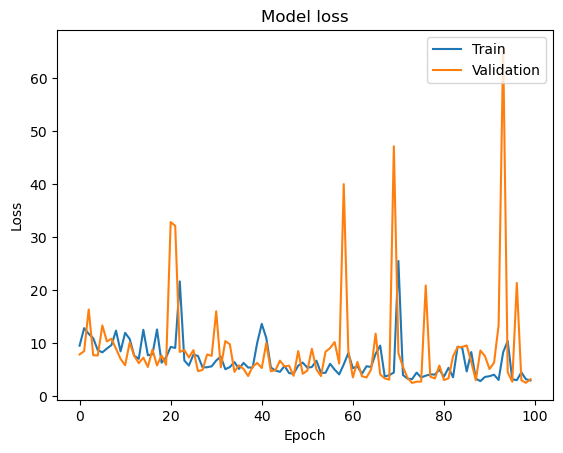

In [33]:
# Plot training & validation loss values

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Plot training & validation loss values

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## 2. Scatter Plot of Predictions vs. True Values

A scatter plot comparing the model's predictions against the true values can provide insight into how well the model is performing across the dataset.

46/46 [==============================] - 0s 302us/step


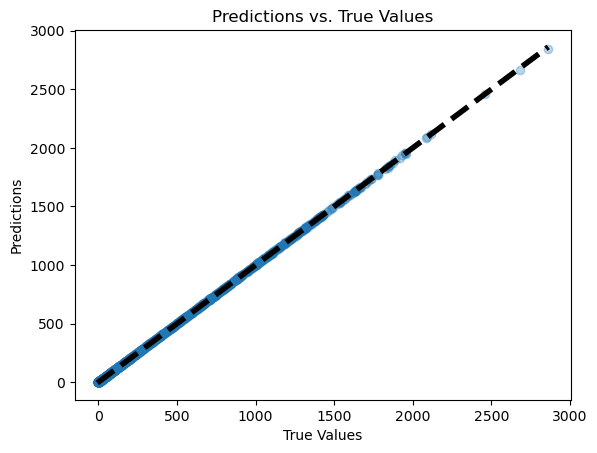

In [34]:
y_pred = model.predict(X_test_scaled).flatten()

plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Predictions vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

## 3. Distribution of Prediction Errors

Analyzing the distribution of prediction errors (residuals) can help determine if there are systematic errors in the model's predictions.

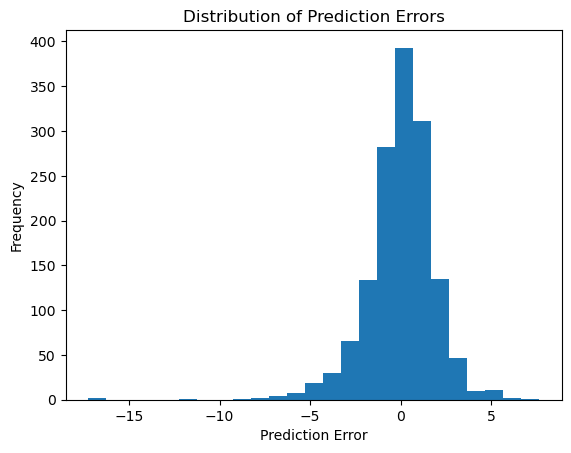

In [35]:
errors = y_pred - y_test

plt.hist(errors, bins=25)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

## 4. Model Performance Metrics

Besides visualizing the results, computing performance metrics can provide quantitative insight into the model's accuracy. For regression tasks, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 1.35
Mean Squared Error (MSE): 3.68
R-squared (R2): 1.00


# After testing the Feedforward Neural Network (FNN)

After testing the Feedforward Neural Network (FNN) model on the test set, the next steps are very important for improving the model, figuring out what the results mean, and maybe even putting the model to use in real life.

Here is a list of things to think about next:

### Hyperparameter Tuning

To make the model work better, I can change its **hyperparameters**, which include the number of layers, the number of neurons in each layer, the learning rate, and the batch size. I can use tools like Optuna or Keras Tuner to do the search for the best hyperparameters.

Let's do it:

In [37]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(n_features,)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Reloading Tuner from my_dir/keras_tuner_demo/tuner0.json


### Regularization

In [38]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

### Interpretation and Analysis

Feature Importance with SHAP
Using SHAP to interpret the model:

/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


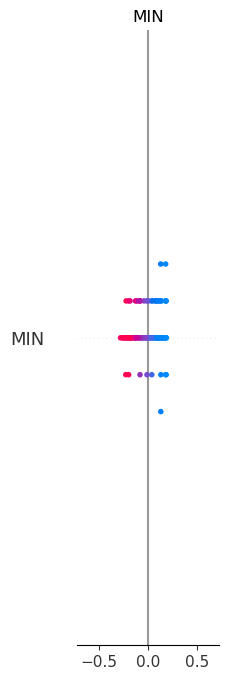

In [39]:
# Keras model

explainer = shap.DeepExplainer(model, X_train_scaled[:100]) # Using a subset of data for explanation
shap_values = explainer.shap_values(X_test_scaled[:100]) # Similarly, using a subset for computation efficiency

# Plot the feature importance
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=features.columns)

## Error Analysis

Examining where the model makes the biggest mistakes:

In [40]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate errors
errors = y_test - y_pred.flatten()

# Identify the largest errors
largest_errors = errors.abs().sort_values(ascending=False)[:10]

# Investigate the corresponding data points
error_analysis_data = X_test.loc[largest_errors.index]
print(error_analysis_data)

46/46 [==============================] - 0s 301us/step
       MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  \
6475  2476  764  1311   0.583    97   288    0.337  379  468   0.810   206   
3454  3026  857  1580   0.542   149   406    0.367  388  531   0.731    97   
0     3119  731  1433   0.510   139   334    0.416  679  750   0.905    46   
4221  2629  630  1473   0.428   119   411    0.290  296  451   0.656   109   
6479  2475  642  1214   0.529   150   366    0.410  384  467   0.822   194   
681   2863  718  1359   0.528    12    44    0.273  482  674   0.715   192   
2789  2513  542   973   0.557     0     0    0.000  225  358   0.628   293   
2110  2808  401   819   0.490   100   258    0.388  229  329   0.696   134   
2770  2836  647  1435   0.451    89   272    0.327  422  527   0.801    59   
1375  2681  570  1153   0.494    12    26    0.462  294  366   0.803   220   

      DREB   REB  AST  STL  BLK  TOV   PF   PTS  
6475   813  1019  584  109   63  281

In [41]:
# Save the trained Keras model
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Save the entire model to a keras file.
# The .h5 extension indicates that the model should be saved to HDF5.
# Creates a keras file 'my_nba_predictions_model.keras'

model.save('my_nba_predictions_model.keras')

# I will continue tomorrow.